<a href="https://colab.research.google.com/github/oscartg25/Yelp_GoogleMaps_ProyectoFinal/blob/master/ML_Pizzas%20hut_ny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**EDA**

In [3]:
df_gpt3 = pd.read_excel('data_gpt3.xlsx')

In [4]:
df_gpt3.rename(columns={'Comentarios': 'text', 'Estrellas': 'rating'}, inplace=True)


In [19]:
# Convertir la columna 'Estrellas' a tipo numérico
df_gpt3['Estrellas'] = pd.to_numeric(df['Estrellas'], errors='coerce')

In [11]:
# Contar la frecuencia de cada valor en la columna de estrellas
star_counts = df_gpt3['rating'].value_counts().sort_index()

# Imprimir el recuento de estrellas
print("Recuento de estrellas:")
print(star_counts)

Recuento de estrellas:
1    81
2    15
3    24
4    25
5    22
Name: rating, dtype: int64


In [12]:
# Calcular el total de observaciones
total_observaciones = star_counts.sum()


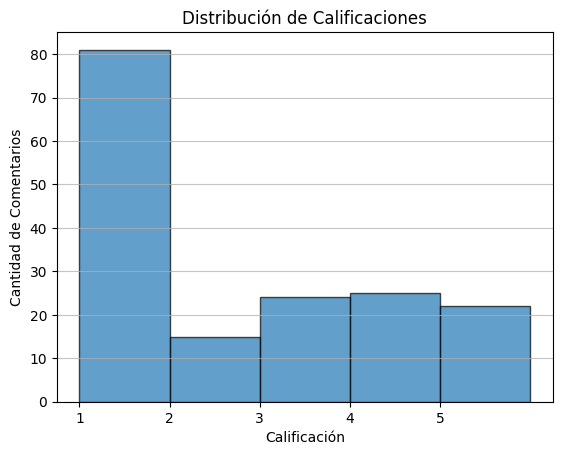

In [21]:
# Crear el histograma de calificaciones
plt.hist(df_gpt3['rating'], bins=[1, 2, 3, 4, 5, 6], edgecolor='black', alpha=0.7)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Comentarios')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', alpha=0.75)

# Mostrar el histograma
plt.show()

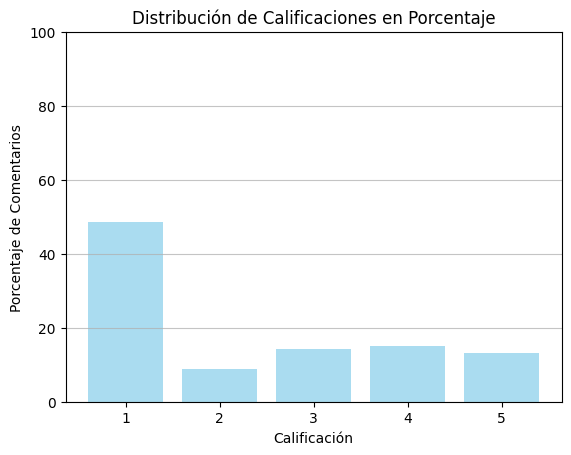

In [22]:
# Calcular los porcentajes de cada calificación
rating_counts = df_gpt3['rating'].value_counts(normalize=True) * 100

# Crear el histograma de calificaciones en porcentaje
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', alpha=0.7)
plt.title('Distribución de Calificaciones en Porcentaje')
plt.xlabel('Calificación')
plt.ylabel('Porcentaje de Comentarios')
plt.xticks(rating_counts.index)
plt.ylim(0, 100)  # Asegurar que el eje Y va de 0 a 100
plt.grid(axis='y', alpha=0.75)

# Mostrar el histograma en porcentaje
plt.show()

In [29]:
# Descargar las stopwords si aún no las tienes
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# Obtener la lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

In [31]:
# Definir una función para preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar signos de puntuación
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Tokenización (separar el texto en palabras)
    tokens = text.split()

    return tokens

In [32]:
# Aplicar la función de preprocesamiento a la columna 'text'
df_gpt3['preprocessed_text'] = df_gpt3['text'].apply(preprocess_text)

# Mostrar las primeras filas del DataFrame con el texto preprocesado
print(df_gpt3.head())

                                                text  rating  Estrellas  \
0  Ordered lunch to our hotel room while taking a...       5          5   
1  We had delivered to hotel.  Very friendly and ...       5          5   
2  Since they have moved locations I think the qu...       5          5   
3  Unfortunately, they have not been open for sit...       5          5   
4  Took my daughter out for Pizza Hut for a coupl...       5          5   

                                   preprocessed_text  
0  [ordered, lunch, to, our, hotel, room, while, ...  
1  [we, had, delivered, to, hotel, very, friendly...  
2  [since, they, have, moved, locations, i, think...  
3  [unfortunately, they, have, not, been, open, f...  
4  [took, my, daughter, out, for, pizza, hut, for...  


In [34]:
df_gpt3

,text,rating,Estrellas,preprocessed_text
0,Ordered lunch to our hotel room while taking a...,5,5,"[ordered, lunch, to, our, hotel, room, while, ..."
1,We had delivered to hotel. Very friendly and ...,5,5,"[we, had, delivered, to, hotel, very, friendly..."
2,Since they have moved locations I think the qu...,5,5,"[since, they, have, moved, locations, i, think..."
3,"Unfortunately, they have not been open for sit...",5,5,"[unfortunately, they, have, not, been, open, f..."
4,Took my daughter out for Pizza Hut for a coupl...,5,5,"[took, my, daughter, out, for, pizza, hut, for..."
...,...,...,...,...
162,"Under construction, the contractor are coverin...",1,1,"[under, construction, the, contractor, are, co..."
163,I ordered online and used Apple Pay. The woman...,1,1,"[i, ordered, online, and, used, apple, pay, th..."
164,"I would prefer to give this ZERO stars, but ac...",1,1,"[i, would, prefer, to, give, this, zero, stars..."
165,I order two pizzas two orders of wings and bre...,1,1,"[i, order, two, pizzas, two, orders, of, wings..."


Modelo


In [47]:
# Crear un objeto TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [48]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
train_df, test_df = train_test_split(df_gpt3, test_size=0.2, random_state=42)

# Mostrar información sobre los tamaños de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", len(train_df))
print("Tamaño del conjunto de prueba:", len(test_df))

Tamaño del conjunto de entrenamiento: 133
Tamaño del conjunto de prueba: 34


In [49]:
# Entrenar el vectorizador en el conjunto de entrenamiento
tfidf_vectorizer.fit(train_df['preprocessed_text'].apply(lambda tokens: ' '.join(tokens)))

# Crear un objeto clasificador RandomForest
classifier = RandomForestClassifier(random_state=42)

In [50]:
# Entrenar el modelo en el conjunto de entrenamiento
X_train = tfidf_vectorizer.transform(train_df['preprocessed_text'].apply(lambda tokens: ' '.join(tokens)))
y_train = train_df['rating']
classifier.fit(X_train, y_train)

# Predecir las calificaciones en el conjunto de prueba
X_test = tfidf_vectorizer.transform(test_df['preprocessed_text'].apply(lambda tokens: ' '.join(tokens)))
y_test = test_df['rating']
y_pred = classifier.predict(X_test)


In [51]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.5882352941176471


**ANALISIS DE SENTIMIENTOS**

In [54]:
from textblob import TextBlob


In [60]:
# Función para realizar el análisis de sentimiento
def analyze_sentiment(tokens):
    text = ' '.join(tokens)
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positivo"
    elif analysis.sentiment.polarity < 0:
        return "Negativo"
    else:
        return "Neutro"

In [61]:
# Aplicar el análisis de sentimiento a los comentarios
df_gpt3['sentiment'] = df_gpt3['preprocessed_text'].apply(analyze_sentiment)

In [64]:
# Mostrar las primeras filas del DataFrame con el análisis de sentimiento
print(df_gpt3.head())

                                                text  rating  Estrellas  \
0  Ordered lunch to our hotel room while taking a...       5          5   
1  We had delivered to hotel.  Very friendly and ...       5          5   
2  Since they have moved locations I think the qu...       5          5   
3  Unfortunately, they have not been open for sit...       5          5   
4  Took my daughter out for Pizza Hut for a coupl...       5          5   

                                   preprocessed_text sentiment  
0  ordered lunch to our hotel room while taking a...  Positivo  
1  we had delivered to hotel very friendly and fa...  Positivo  
2  since they have moved locations i think the qu...  Positivo  
3  unfortunately they have not been open for sit ...  Negativo  
4  took my daughter out for pizza hut for a coupl...  Positivo  


In [63]:
# Convertir la columna preprocessed_text en texto plano
df_gpt3['preprocessed_text'] = df_gpt3['preprocessed_text'].apply(lambda tokens: ' '.join(tokens))

In [66]:
# Crear un nuevo DataFrame con la columna de comentarios preprocesados y la columna de sentimiento
new_df = df_gpt3[['preprocessed_text', 'sentiment']]



In [72]:
new_df.head

<bound method NDFrame.head of                                                 prompt    completion
0    ordered lunch to our hotel room while taking a...  Positive_END
1    we had delivered to hotel very friendly and fa...  Positive_END
2    since they have moved locations i think the qu...  Positive_END
3    unfortunately they have not been open for sit ...  Negative_END
4    took my daughter out for pizza hut for a coupl...  Positive_END
..                                                 ...           ...
162  under construction the contractor are covering...  Positive_END
163  i ordered online and used apple pay the woman ...   Neutral_END
164  i would prefer to give this zero stars but act...  Positive_END
165  i order two pizzas two orders of wings and bre...  Positive_END
166  save your money and go somewhere else i used t...  Positive_END

[167 rows x 2 columns]>

In [69]:
# Renombrar las columnas
new_df.rename(columns={'preprocessed_text': 'prompt', 'sentiment': 'completion'}, inplace=True)


<ipython-input-69-6625205c828b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'preprocessed_text': 'prompt', 'sentiment': 'completion'}, inplace=True)


In [71]:
# Mapear los valores en la columna completion según las especificaciones
new_df['completion'] = new_df['completion'].map({
    'Positivo': 'Positive_END',
    'Negativo': 'Negative_END',
    'Neutro': 'Neutral_END'
})

<ipython-input-71-9bcca13595f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['completion'] = new_df['completion'].map({


In [73]:
# Especificar la ruta del archivo CSV
csv_file_path = 'data.csv'

# Exportar el DataFrame a un archivo CSV
new_df.to_csv(csv_file_path, index=False)

In [74]:
from shutil import copyfile

# Especifica la ruta en Google Drive donde deseas guardar el archivo
google_drive_path = '/content/drive/MyDrive/new_df.csv'

# Copiar el archivo a Google Drive
copyfile(csv_file_path, google_drive_path)

FileNotFoundError: ignored